# 탐색적 데이터 분석(EDA : Exploratory Data Analysis)

- 통찰을 얻기 위한 데이터 분석의 가장 기본이 되는 방법
- 탐색적 데이터 분석의 과정
    1. 데이터 파악
        - 데이터의 외형적인 내용을 파악하는 단계
        - raw data : 분석에 활용된 적이 없는, 또는 정제되지 않은 데이터
        1. 데이터의 출처와 주제 파악
            - 데이터가 어디에서 생성된 것 인지
            - 데이터가 어떻게 수집된 것 인지
            - 예) 데이터의 이름, 구성 요소, 출처, 주제 등
            
        2. 데이터의 크기 파악
            - 데이터의 크기에 따라서 데이터의 처리방식이 달라지기 때문에
            - 예) 샘플링 : 어떤 자료로부터 일부의 값을 추출하는 행위
                - 데이터가 너무 크거나 전체 데이터를 활용할 수 없는 경우에 수행
        
        3. 데이터의 구성 요소(피처) 파악
            - 데이터가 어떻게 구성되어 있는지 어떤 정보를 담고있는지를 파악하는 아주 중요한 단계
            - 예) 신체검사 데이터의 키, 몸무게, 시력, 청력 등
        
    2. 데이터의 속성 탐색
        - 데이터의 실제적인 내용을 파악하는 단계
        1. 피처의 속성 탐색
            - 피처 속성 탐색 단계에서 가장 중요한 것은 **데이터에 질문을 던지는 것**
                - 예) 우리 반의 평균 키는 몇이나 될까?
            - 평균, 표준편차, 중앙값, 사분위 수 등의 통계값을 통해 피처의 정량적 속성을 정의
                
        2. 피처 간의 상관 관계 탐색
            - 여러 피처가 서로에게 미치는 영향을 알아보는 단계
                - 예) 학급이 비만인지 알아보려 했다고 가정하면 몸무게와 관계가 있는 피처를 파악(키)
            
    3. 탐색한 데이터의 시각화
        - 지금까지 파악한 데이터를 효과적으로 시각화
        - 시각화는 수치적 자료만 가지고는 파악하기 힘든 패턴이나 통찰을 발견하는데에 유용

# 멕시코풍 프랜차이즈 chipotle 주문 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
chipo = pd.read_csv("./data/chipotle.tsv", sep = "\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## 데이터 파악

In [6]:
# 데이터의 행과 열 파악
chipo.shape

(4622, 5)

In [8]:
# 데이터 타입 파악
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [9]:
# 구성 정보 파악
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [10]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

- 피처의 의미
    - order_id : 주문 번호
    - quantity : 아이템의 주문 수량
    - item_name : 주문한 아이템의 이름
    - choice_description : 주문한 아이템의 상세 선택 옵션
    - item_price : 주문 아이템의 가격 정보

### 피처 형태의 종류

- 수치형 피처
    - 연속형 피처
        - 어떤 구간 안의 모든 값을 데이터로써 가질 수 있음
            - 예) 키, 몸무게
    - 비연속형 피처
        - 셀 수 있으며, 일정 구간 안에서 정해진 몇 개의 값을 가져야 함
            - 예) 나이
    
- 범주형 피처
    - 순서 있는 범주형 피처
        - 순서가 있으나 수치는 아님
            - 학점(A+, A0......)
        
    - 순서 없는 범주형 피처
        - 데이터가 구분되면서도 순서가 없음
            - 예) 혈액형(A, B, O, AB)

In [11]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


- 수치형이 2개라서 describe 컬럼이 2개뿐

- 간이분석 내용
    - 평균 주문 수량은 약 1.08개임
        - 대부분 한 아이템은 하나만 주문한다 
        - 한 사람이 같은 메뉴를 여러개 구매하는 경우는 많지 않다
        
    - order_id는 숫자의 의미를 갖지 않음
        - str로 변환하는 게 분석에 용이할 수 있음
        
    - item_price는 수치적 특징을 파악해야하는데 object타입이기 때문에 수치형으로 변환해야함
        - 데이터 전처리 필요

In [13]:
# 범주형 피처의 데이터 개수 파악하기
print(len(chipo["order_id"].unique()))   # unique : 고유값
print(len(chipo["item_name"].unique()))

1834
50


In [15]:
chipo["order_id"].nunique()   #  # nunique : 고유값 수

1834

## 데이터 속성 탐색

### 가장 많이 주문한 아이템 Top10

In [17]:
chipo["item_name"].value_counts().head(10)

item_name
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: count, dtype: int64

### 아이템별 주문 횟수와 총량

In [18]:
order_cnt = chipo.groupby("item_name")["order_id"].count()
order_cnt.head(10)

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [19]:
# 아이템별 주문 총량(판매량)
item_qt = chipo.groupby("item_name")["quantity"].sum()
item_qt.head(10)

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

## 간이 시각화

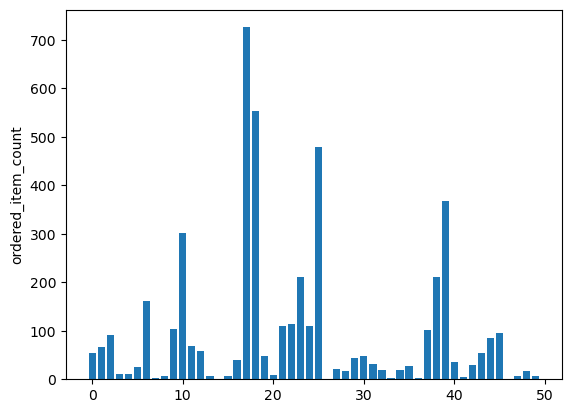

In [20]:
# item수가 너무 많아서 시각화로 다 나타내기 힘들기 때문에 숫자로 표현
x_pos = np.arange(len(item_qt))

plt.bar(x_pos, order_cnt)
plt.ylabel("ordered_item_count")
plt.show()

## 데이터 전처리

### item_price 피처 전처리 

In [21]:
chipo["item_price"].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

- 원인
    - 가격을 나타내는 숫자 앞에 $ 기호가 붙어 있음
    
- 해결 방안
    - map와 lambda를 통해 float형으로 변환
    - map
        - 시리즈의 각 값에 함수를 적용할 수 있는 기능
    - lambda 
        - 임시로 사용할 익명 함수를 간편하게 표현하는 방식

In [23]:
chipo["item_price"] = chipo["item_price"].map(lambda x: float(x[1:]))

In [24]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [28]:
chipo.dtypes   # float64로 바뀐거 확인

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [29]:
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


## 깊이 있는 데이터 탐색

### 주문당 평균 계산금액(객단가) 

In [31]:
chipo.groupby("order_id")["item_price"].sum().mean()

18.811428571428568

- 한 사람이 약 19달러 가량의 주문을 할 것으로 예상됨

### 한 주문에 20달러 이상 지불한 주문

1. order_id를 기준으로 그룹화
2. item_price의 합계를 기준으로 필터링

In [34]:
order_group = chipo.groupby("order_id").sum()
order_group[order_group["item_price"] >= 20]

,quantity,item_name,choice_description,item_price
order_id,,,,
4,2,Steak BurritoSteak Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",21.00
18,4,Chicken Soft TacosChicken Soft TacosChips and ...,"[Roasted Chili Corn Salsa, Rice][Roasted Chili...",24.90
20,4,Chips and GuacamoleChicken BowlSteak BurritoCh...,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",36.20
21,3,Chicken BurritoSteak BurritoIzze,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",23.36
26,2,Barbacoa Soft TacosVeggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Black...",20.50
...,...,...,...,...
1827,5,Chicken BowlChips and GuacamoleCanned Soft Dri...,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]][...",32.95
1829,3,Steak BurritoVeggie BurritoCanned Soft Drink,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",24.25
1830,2,Steak BurritoVeggie Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",23.00


### 각 아이템의 가격 구하기

- 현재 아이템 데이터는 없기 때문에 아이템의 가격을 구하기 위해서는 주문 데이터에서 유추하는 방법밖에 없음

1. 동일한 아이템을 1개만 구매한 주문을 선별
2. item_name을 기준으로 그룹화한 뒤 각 그룹별 최저가를 계산
3. item_price를 기준으로 정렬

In [35]:
# 1. 동일한 아이템을 1개만 구매한 주문을 선별
one_item = chipo[chipo["quantity"] == 1]

In [36]:
one_item.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98


In [37]:
# 2. item_name 을 기준으로 그룹화한 뒤 각 그룹별 최저가를 계산
item_price = one_item.groupby("item_name").min()

In [38]:
item_price

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,129,1,[Coke],6.49
Barbacoa Bowl,19,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,11,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,75,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,17,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


In [39]:
# 정렬
item_price.sort_values(by = "item_price", ascending = False)   # ascending = False : 내림차순

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


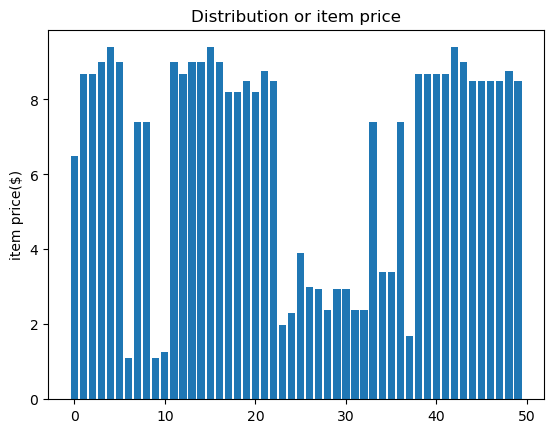

In [40]:
# 아이템 가격 시각화
x_pos = np.arange(len(item_price))

plt.bar(x_pos, item_price["item_price"])
plt.ylabel("item price($)")
plt.title("Distribution or item price")
plt.show()

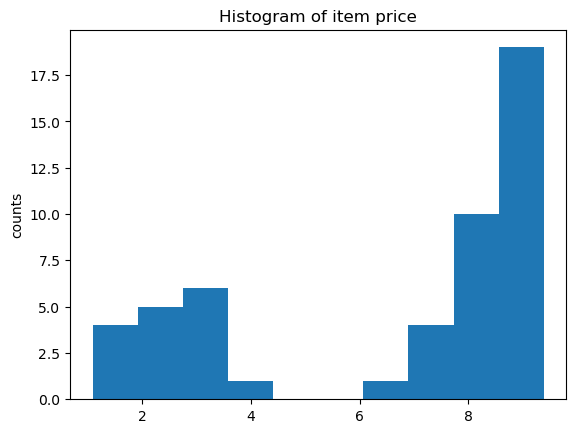

In [41]:
# 아이템 가격 히스토그램

plt.hist(item_price["item_price"])
plt.ylabel("counts")
plt.title("Histogram of item price")
plt.show()

### 가장 비싼 주문은 총 몇 개의 아이템을 주문했는지 파악

In [42]:
chipo.groupby("order_id").sum().sort_values(by = "item_price", ascending = False).head()

,quantity,item_name,choice_description,item_price
order_id,,,,
926,23,Steak BurritoChicken BowlChicken BowlChicken B...,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuc...",205.25
1443,35,Chips and Fresh Tomato SalsaBottled Water6 Pac...,"[Coke][Fresh Tomato Salsa, [Fajita Vegetables,...",160.74
1483,14,Chicken BowlSteak BowlChicken BurritoSteak Bow...,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",139.00
691,11,Chicken BurritoChicken Salad BowlSteak Burrito...,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Sou...",118.25
1786,20,Chicken BowlCarnitas BurritoChicken BowlChicke...,"[Fresh Tomato Salsa, Rice][Fresh Tomato Salsa,...",114.30


### Veggie Salad Bowl 이 몇 번 주문되었는지 파악

In [46]:
salad_df = chipo[chipo["item_name"] == "Veggie Salad Bowl"]

In [47]:
salad_df.head()

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [51]:
# 한 주문 내에서 중복 집계된 데이터를 제외
salad_df = salad_df.drop_duplicates("order_id")
salad_df.head()

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [49]:
len(salad_df)

18

### Chicken Bowl을 2개 이상 주문한 고객들의 Chicken Bowl 메뉴에 대한 총 주문 수량 구하기 

In [52]:
chicken_df = chipo[chipo["item_name"] == "Chicken Bowl"]

In [53]:
chicken_df.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49


In [59]:
group_chicken = chicken_df.groupby("order_id")["quantity"].sum()
group_chicken.head()

order_id
2     2
3     1
7     1
10    1
13    1
Name: quantity, dtype: int64

In [60]:
group_chicken.sum()

761

In [61]:
result = group_chicken[group_chicken >= 2]

In [62]:
result.head()

order_id
2      2
34     2
70     2
93     2
124    3
Name: quantity, dtype: int64

In [63]:
result.sum()

260

### 아이템별 주문총량 출력하기

In [66]:
chipo.groupby(["item_name"])["quantity"].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


### 한 주문에 20달러 이상 지불한 손님 수 출력하기

In [67]:
order_group = chipo.groupby("order_id")["item_price"].sum()
order_group

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [68]:
len(order_group[order_group.values >= 20])

589